In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
trader_df = pd.read_csv("/historical_data.csv")
sentiment_df = pd.read_csv("/fear_greed_index.csv")

print("Trader Data:")
print(trader_df.head())
print("\nSentiment Data:")
print(sentiment_df.head())

Trader Data:
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   

   Closed PnL                                   Transaction Hash     Order ID  \
0         

In [11]:
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])

In [15]:
trader_df['datetime'] = pd.to_datetime(trader_df['Timestamp IST'], format='%d-%m-%Y %H:%M')

trader_df['date'] = trader_df['datetime'].dt.normalize()

print(trader_df[['Timestamp IST', 'datetime', 'date']].head())

      Timestamp IST            datetime       date
0  02-12-2024 22:50 2024-12-02 22:50:00 2024-12-02
1  02-12-2024 22:50 2024-12-02 22:50:00 2024-12-02
2  02-12-2024 22:50 2024-12-02 22:50:00 2024-12-02
3  02-12-2024 22:50 2024-12-02 22:50:00 2024-12-02
4  02-12-2024 22:50 2024-12-02 22:50:00 2024-12-02


In [19]:
merged_df = pd.merge(trader_df, sentiment_df, on='date', how='left')
display(merged_df.head())
merged_df.to_csv("merged_data.csv")

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,Order ID,Crossed,Fee,Trade ID,Timestamp,datetime,date,timestamp,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02 22:50:00,2024-12-02,1.733117e+09,80.0,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02 22:50:00,2024-12-02,1.733117e+09,80.0,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02 22:50:00,2024-12-02,1.733117e+09,80.0,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02 22:50:00,2024-12-02,1.733117e+09,80.0,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02 22:50:00,2024-12-02,1.733117e+09,80.0,Extreme Greed


                   total_pnl  average_pnl  trade_count  total_volume
classification                                                      
Extreme Fear    7.391102e+05    34.537862        21400  1.144843e+08
Extreme Greed   2.715171e+06    67.892861        39992  1.244652e+08
Fear            3.357155e+06    54.290400        61837  4.833248e+08
Greed           2.150129e+06    42.743559        50303  2.885825e+08
Neutral         1.292921e+06    34.307718        37686  1.802421e+08


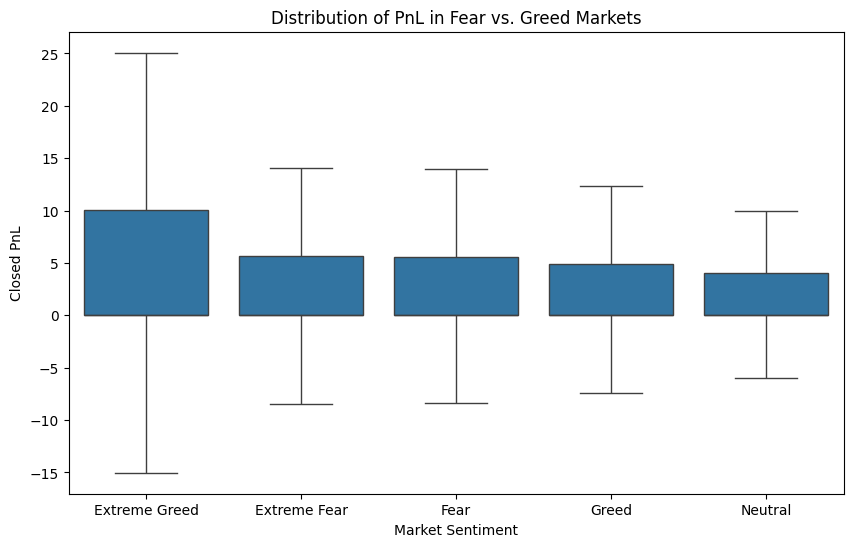

In [36]:
# Group by 'Classification' (Fear/Greed) and calculate key metrics
sentiment_analysis = merged_df.groupby('classification').agg(
    total_pnl=('Closed PnL', 'sum'),
    average_pnl=('Closed PnL', 'mean'),
    trade_count=('Account', 'count'),
    total_volume=('Size USD', 'sum')
)
print(sentiment_analysis)

# --- Visualization 1: PnL Distribution ---
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df, x='classification', y='Closed PnL', showfliers=False) # showfliers=False to ignore extreme outliers for a cleaner plot
plt.title('Distribution of PnL in Fear vs. Greed Markets')
plt.ylabel('Closed PnL')
plt.xlabel('Market Sentiment')
plt.savefig("pnl_distribution.png") # Save this to your outputs/ folder
plt.show()

# --- Visualization 2: Average Leverage ---
# Removed Average Leverage calculation and visualization as the column was not found

--- Top 5 Traders in FEAR ---
                                        Account classification     total_pnl  \
2    0x083384f897ee0f19899168e3b1bec365f52a9012           Fear  1.113374e+06   
143  0xbaaaf6571ab7d571043ff1e313a9609a10637864           Fear  6.208724e+05   
67   0x513b8629fe877bb581bf244e326a047b249c4ff1           Fear  3.671662e+05   
57   0x4acb90e786d897ecffb614dc822eb231b4ffb9f4           Fear  2.967817e+05   
148  0xbd5fead7180a9c139fa51a103cb6a2ce86ddb5c3           Fear  2.367977e+05   

     win_rate  trade_count  
2    0.526434         1778  
143  0.498271        12437  
67   0.370507         5981  
57   0.409026         1396  
148  0.498730         1181  

--- Top 5 Traders in GREED ---
                                        Account classification      total_pnl  \
137  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23          Greed  534058.236330   
78   0x72743ae2822edd658c0c50608fd7c5c501b2afbd          Greed  453595.318176   
3    0x083384f897ee0f19899168e3b1bec365f

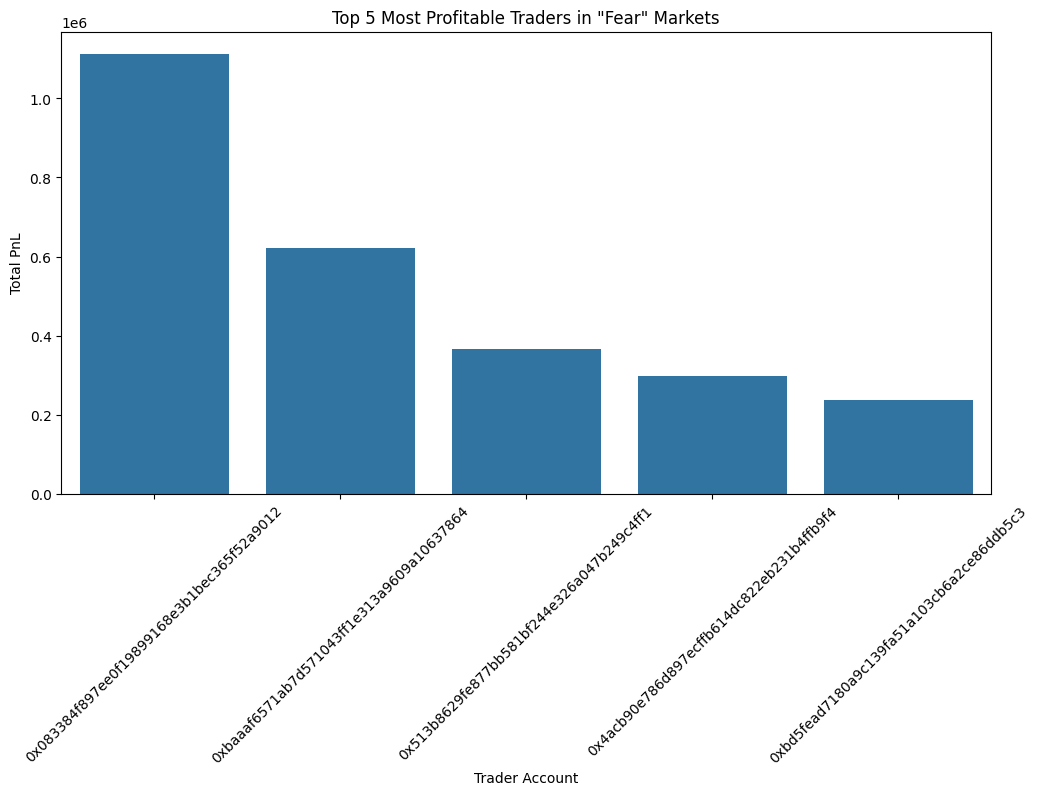

In [30]:
# Group by both account and sentiment
trader_sentiment_df = merged_df.groupby(['ccount', 'classification']).agg(
    total_pnl=('Closed PnL', 'sum'),
    win_rate=('Closed PnL', lambda x: (x > 0).mean()), # Win Rate = % of trades > 0 PnL
    trade_count=('Account', 'count')
).reset_index()

# Sort to find top traders
top_traders_fear = trader_sentiment_df[trader_sentiment_df['classification'] == 'Fear'].sort_values(by='total_pnl', ascending=False)
top_traders_greed = trader_sentiment_df[trader_sentiment_df['classification'] == 'Greed'].sort_values(by='total_pnl', ascending=False)

print("--- Top 5 Traders in FEAR ---")
print(top_traders_fear.head(5))

print("\n--- Top 5 Traders in GREED ---")
print(top_traders_greed.head(5))

# --- Visualization 3: Top 5 Traders in FEAR ---
plt.figure(figsize=(12, 6))
sns.barplot(data=top_traders_fear.head(5), x='Account', y='total_pnl')
plt.title('Top 5 Most Profitable Traders in "Fear" Markets')
plt.ylabel('Total PnL')
plt.xlabel('Trader Account')
plt.xticks(rotation=45)
plt.savefig("top_traders_fear.png") # Save this to your outputs/ folder
plt.show()